In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api  as smf
import statsmodels.api as sm

In [2]:
#Creating arrays
bmi  = np.array([4.5 , 5.8 , 6.5 , 7.0 , 5.0 , 6.0 , 8.6])
glu  = np.array([190 , 220 , 280 , 320 , 200 , 250 , 380 ])

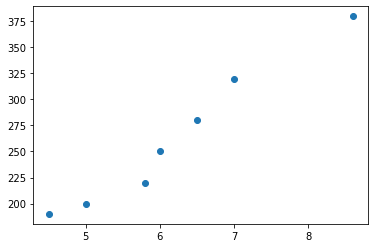

In [3]:
plt.scatter(bmi ,glu)

In [4]:
#creating dataframe
df = pd.DataFrame( { "bmi"  : [4.5 , 5.8 , 6.5 , 7.0 , 5.0 , 6.0 , 8.6] , 
                      "glu" : [190 , 220 , 280 , 320 , 200 , 250 , 380 ]})

In [5]:
df.head()

,bmi,glu
0,4.5,190
1,5.8,220
2,6.5,280
3,7.0,320
4,5.0,200


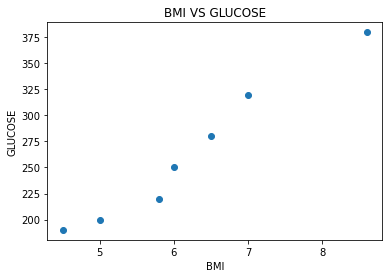

In [6]:
plt.scatter(df["bmi"] , df["glu"])
plt.xlabel("BMI")
plt.ylabel("GLUCOSE")
plt.title("BMI VS GLUCOSE")
plt.show()

In [7]:
#Inference 
#BMI and GLucose are positively correlated , that is as BMI increases Glucose increases

In [8]:
# OVERESTIMATES
# If regression line is above all the data points (y_actual - y_predicted)
# 190 - 200 = -10
# So we will have negative residues
# Sum of all residues wil be huge negative

In [9]:
#UNDERESTIMATES
# If regression line is below all the data points
# 190 - 150 = 40
# We will have positive residues
# Sum of all residues will be positive

In [10]:
#We need to claculate Best Fit Line
# y = B0 + B1x
# glu = B0 + B1bmi

In [11]:
#B1 = cov(x,y)
#     --------
#      Var(x)      



In [12]:
#Calculate covariance(x,y)
#                  __         __              
# Cov(x,y) =  (X - X) *  (Y - Y)
#             ___________________
#                   n - 1

In [13]:
#Calculate Variance(x)
#                __  2
#var(x)  =  (X - X)  
#            __________
#            n - 1

# n - 1 = degrees of freedom (for samples)

In [14]:
#   Cov(x,y)
#  _________
#    var(x)

#n -1 gets cancelled out

In [15]:
#calculate beta 1
x = df["bmi"]
y = df["glu"]
x_bar = np.mean(x)
y_bar = np.mean(y)

In [16]:
#NUmerator of Beta1
np.sum((x - x_bar) * (y - y_bar))

551.0

In [17]:
#Denominator of Beta1
(np.sum((x-x_bar)**2))

11.019999999999998

In [18]:
551.0 / 11.019999999999998

50.00000000000001

In [19]:
beta1   = np.sum((x - x_bar) * (y - y_bar)) / (np.sum((x-x_bar)**2))

In [20]:
beta1

50.00000000000001

In [21]:
#Calculate B0
#      __     __ 
# B0 = Y - B1*X

In [22]:
beta0 = y_bar - (beta1*x_bar)

In [23]:
beta0

-47.142857142857224

In [24]:
# Y_predict equation
# y_predict = B0 + B1 * X

y_predict = beta0 + (beta1*x)
y_predict

0    177.857143
1    242.857143
2    277.857143
3    302.857143
4    202.857143
5    252.857143
6    382.857143
Name: bmi, dtype: float64

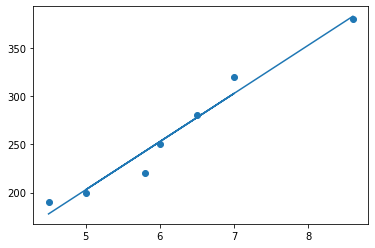

In [25]:
# Y_actual vs Y_predict using scatter plot
plt.scatter(df["bmi"] , df["glu"])   #plots the data point
plt.plot(df["bmi"] , y_predict)      #plots the best fit line

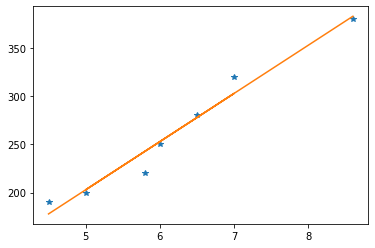

In [26]:
# Y_actual vs Y_predict using line plot
plt.plot(df["bmi"] , df["glu"] , "*")   
plt.plot(df["bmi"] , y_predict) 

In [27]:
# check the correlation coeff between Y and Y_predict
# correlation coeff gives how close your y is to y_predict
np.corrcoef(y,y_predict)

array([[1.        , 0.98245367],
       [0.98245367, 1.        ]])

In [28]:
# 2
#R    values is square of correlation coeeficient
r_square = 0.98245367**2
print("R_SQUARE: ",r_square)

R_SQUARE:  0.9652152136964688


### Cross check the ans with scikit learn

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
X = df[["bmi"]]     # make sure X is 2-d array
Y = df["glu"]

In [31]:
LR = LinearRegression()
LR.fit(X,Y)        # Fit method is used to train the model

LinearRegression()

In [32]:
Y_predict = LR.predict(X)
Y_predict

array([177.85714286, 242.85714286, 277.85714286, 302.85714286,
       202.85714286, 252.85714286, 382.85714286])

In [33]:
#CHeck the model coefficients B0 and B1
#beta1
LR.coef_

array([50.])

In [34]:
#beta0 intercept
LR.intercept_

-47.14285714285728

In [35]:
#R**2 value
LR.score(X,Y)

0.9652152152152152

In [36]:
#Levene Tes
# H0 : Varaiance are same
# H1 :  Variance are not smae
from scipy.stats import levene
levene(x,y)
# Reject null hypothesis , implicating Variance are different
# Since variance are different , we are able to predcit glucose from bmi

LeveneResult(statistic=11.14252530448584, pvalue=0.005909474211362965)

# LOGISTIC REGRESSION

In [37]:
#Predict the class Healthy or Diabetic by Knowing the BMI
g1 = np.array([4.5 , 5.8 , 5.0 , 6.0])  #Healthy group
g2 = np.array([6.5 , 7.0 , 8.6 ])       #Diabetic group

In [38]:
np.mean(g1)

5.325

In [39]:
np.mean(g2)

7.366666666666667

In [40]:
from scipy import stats

In [41]:
#Perform 2-samp t-test
#H0 : mean of g1 = mean of g2
#Ha : mean of g1 != mean of g2
tstat,pval = stats.ttest_ind(g1,g2)

In [42]:
if pval < 0.05:
    print("Reject H0")
else:
    print("We fail to reject H0")

Reject H0


In [43]:
# Inference:
# Mean of group 1is different from mean of group 2
# Hence we can predict Whether person is helathy or diabetic given BMI

In [44]:
df1 = pd.DataFrame( { "bmi"  :     [4.5 , 5.8 , 6.5 , 7.0 , 5.0 , 6.0 , 8.6] , 
                      "glu" :     [190 , 220 , 280 , 320 , 200 , 250 , 380 ] , 
                      "outcome" : [0,0,1,1,0,0,1]})

In [45]:
df1

,bmi,glu,outcome
0,4.5,190,0
1,5.8,220,0
2,6.5,280,1
3,7.0,320,1
4,5.0,200,0
5,6.0,250,0
6,8.6,380,1


In [46]:
#MODEL EQUATION
#  y = B0 + B1*BMI

In [47]:
#Calculation of Beta1
# Beta1 =  cov(bmi,y)
#         ____________
#          var(bmi)

In [48]:
x = df1["bmi"]
y = df1["outcome"]
x_bar  = np.mean(x)
y_bar  = np.mean(y)

In [49]:
#beta1(slope)
beta1 = np.sum((x - x_bar)*(y - y_bar)) / np.sum((x-x_bar)**2)
beta1

0.31760435571687845

In [50]:
#beta0(uintercept)
beta0 =  y_bar - (beta1*x_bar)
beta0

-1.5405755768732179

In [51]:
y_predict = beta0 + (beta1*x)
y_predict

0   -0.111356
1    0.301530
2    0.523853
3    0.682655
4    0.047446
5    0.365051
6    1.190822
Name: bmi, dtype: float64

In [52]:
# The ouput of the y_predict is continous
# But the outcome variable is categorical 
# so we need to convert the continous output to probability score

In [53]:
#Logistic Regression Equation
#                 1
#    y   =    __________
#                      -(B0+B1*X)
#              1  +  e
#  where Linear Regression = B0 + B1*x 
#  All the continous values will be squashed to 0 to 1

In [54]:
#converting to probability score(squashing to 0 and 1)
y_predict_prob = 1 / (1 + np.exp(-y_predict))
y_predict_prob

0    0.472190
1    0.574816
2    0.628048
3    0.664331
4    0.511859
5    0.590262
6    0.766888
Name: bmi, dtype: float64

In [55]:
(1 / (1 + np.exp(-y_predict))).mean()

0.6011993139543458

In [56]:
#converting the probability score to class
# Predicted labels
outcome_pred = []
for val in y_predict_prob:
    if val > np.mean(y_predict_prob):
        outcome_pred.append(1)
    else:
        outcome_pred.append(0)
print(outcome_pred)

[0, 0, 1, 1, 0, 0, 1]


In [57]:
# 100% correct prediction
# our logistic regression is correctly classifying the records

## Implementation on real dataset

In [58]:
import os
os.getcwd()

'C:\\Users\\Netra'

In [59]:
df2 = pd.read_csv("Heart.csv")

In [60]:
df2.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [61]:
#outcome variable is TenYearCHD , we are going to predict

In [62]:
df2.shape

(4238, 16)

In [63]:
df2.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [65]:
# Methods of imputation of hull values 
# 1) Drop the null records
# 2) Replace the NAn Values with the median or random sample. Replace columnwise median


# Detect the outlier
# Outlier is due to data entry , or wear or tear of the IOT device(eg:Battery loss).
# Sensor is picking some errornomous data, that is noise
# Check with the domain experts whther to treat the data point as outlier or not
# IF data point  lie at 6sigma or 7sigma and i s information it is called black swarm event.

# Extreme Values
# Extreme values are the boundary values , it should be in the data
# Dont impute extreme values

# 1) IQR TECHNIQUE
#          __
# 2) | X - X  | > 3*sigma

#  Sometimes outlier needs to be treated as information
#  We have to live with the extreme values


# To reduce the skewness we need to use log transformation

In [66]:
#Check the number of missing values
df2.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [67]:
df2_clean = df2.dropna()

In [68]:
df2_clean.shape

(3656, 16)

In [69]:
#Number of rows dropped
df2.shape[0] - df2_clean.shape[0]

582

In [70]:
#Percentage
(582/4240)*100

13.726415094339622

In [71]:
#13% of null values are drop 
# As a thumb rule 10-15% of null values will be dropped

In [72]:
df2.rename(columns = {"male":"Gender"} , inplace = True)

In [73]:
df2.corr().T

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Gender,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


In [74]:
# From above correlation matrix we can conclude
# TenYearCHD is strongly affected by the age as corr = 0.22
# TenYearCHD is strongly affected by the sysBP as corr = 0.21

# Based on coreelation we cannot cannot conclude whoch feature is strongly contributing 
# Suppose if highest 0.23 , then 0.02 also considered a strong correlation

In [75]:
# We need to check with statstical tests only

In [76]:
df2.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [77]:
# CHeck whether Gender is contributing or not to predict CHD
# Gender is categorical and CHD is also categorical
# Categorical vs Categorical ==>  2-sample proprotion test

# CHeck age is a good feature to predict CHD
# Age is numerical and CHD is categorical
# If we have even 1 column as numerical it is 2-sample t test

# CHeck education vs CHD
# education categorical vs CHD categorical
# But education has more than 2 groups Chi-square test

#check smoker(2 groups) vs CHD
# categorical vs categorical
# 2-sample proportion test

#CIgsper Day vs CHD
# Continous vs Categorical
# 2-sample t-test

# BPMEDS vs CHD
print("TO CHECK THE CATEGORY WE USE VALUE_COUNTS")
print("BPMeds Category is")
df2["BPMeds"].value_counts()
# categorical vs categorical 
# 2 - sample proprotion test

#Prevelant Storke vs CHD
# Categorical vs Categorical 
# 2-sample proportion test



TO CHECK THE CATEGORY WE USE VALUE_COUNTS
BPMeds Category is


0.0    4061
1.0     124
Name: BPMeds, dtype: int64

## Logistic Regression

In [78]:
# Step 1: Split X and Y
X = df2_clean.drop("TenYearCHD" , axis = 1)
Y = df2_clean["TenYearCHD"]

In [79]:
X.shape

(3656, 15)

In [80]:
type(Y)

pandas.core.series.Series

In [81]:
df2_clean.rename(columns = {"male" : "Gender"} , inplace = True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [82]:
#INtroduce a constant column
# Input to B0
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df2_clean)
df_constant.head()

,const,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [83]:
#Fitting the logit
cols   = df_constant.columns[:-1]
model  = sm.Logit(df2_clean["TenYearCHD"] , df_constant[cols] )
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.376668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3640
Method:                           MLE   Df Model:                           15
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:                  0.1174
Time:                        16:07:51   Log-Likelihood:                -1377.1
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 8.027e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3222      0.715    -11.632      0.000      -9.725      -6.920
Gender              0.5551      0.109      5.090      0.000       0.341       0.769
age                 0.0635      0.007      9.499      0.000       0.050       0.077
education          -0.0475      0.049     -0.962      0.336      -0.144       0.049
currentSmoker       0.0709      0.157      0.452      0.651      -0.236       0.378
cigsPerDay          0.0179      0.006      2.874      0.004       0.006       0.030
BPMeds              0.1623      0.234      0.692      0.489      -0.297       0.621
prevalentStroke     0.6935      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2346      0.138      1.700      0.089      -0.036       0.505
diabetes            0.0395      0.315      0.125      0.900      -0.579       0.658
totChol             0.0023      0.001      2.062      0.039       0.000       0.005
sysBP               0.0154      0.004      4.043      0.000       0.008       0.023
diaBP              -0.0041      0.006     -0.642      0.521      -0.017       0.008
BMI                 0.0066      0.013      0.518      0.605      -0.018       0.032
heartRate          -0.0032      0.004     -0.772      0.440      -0.012       0.005
glucose             0.0071      0.002      3.189      0.001       0.003       0.012
===================================================================================
"""

In [84]:
# H0 : Slopes = 0
# Ha : Slopes != 0
#Pval > 0.05 , we fail to reject H0 , that is slope is 0
# Slope is 0 means there is no effect of feature on Y
# Hence Feature is removed

In [85]:
largest_pvalue = round(result.pvalues,3).nlargest(10)
largest_pvalue

diabetes           0.900
currentSmoker      0.651
BMI                0.605
diaBP              0.521
BPMeds             0.489
heartRate          0.440
education          0.336
prevalentStroke    0.157
prevalentHyp       0.089
totChol            0.039
dtype: float64

In [86]:
largest_pvalue.index

Index(['diabetes', 'currentSmoker', 'BMI', 'diaBP', 'BPMeds', 'heartRate',
       'education', 'prevalentStroke', 'prevalentHyp', 'totChol'],
      dtype='object')

In [87]:
#The above 2 patches are used in below codes

In [88]:
#df_constant.rename(columns = {"male" : "Gender"} , inplace = True)

## Feature Selection : Backward Elimination(P-value Approach)

In [89]:
def back_feature_elem(data_frame , dep_var , col_list):
    # Takes in data frame , dependent variabel ,column names
    # P-value alpha alpha one at a time and returns regression summary with all pvalues
    
    while len(col_list) > 0 :
        model  = sm.Logit(dep_var,df_constant[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)

result = back_feature_elem(df_constant , df2_clean.TenYearCHD , cols)

In [90]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3649
Method:                           MLE   Df Model:                            6
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:                  0.1147
Time:                        16:07:55   Log-Likelihood:                -1381.2
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 2.885e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1298      0.476    -19.199      0.000     -10.062      -8.198
Gender         0.5614      0.107      5.255      0.000       0.352       0.771
age            0.0659      0.006     10.254      0.000       0.053       0.078
cigsPerDay     0.0192      0.004      4.604      0.000       0.011       0.027
totChol        0.0023      0.001      2.024      0.043    7.16e-05       0.004
sysBP          0.0175      0.002      8.159      0.000       0.013       0.022
glucose        0.0073      0.002      4.342      0.000       0.004       0.011
==============================================================================
"""

In [91]:
result.params

const        -9.129843
Gender        0.561446
age           0.065896
cigsPerDay    0.019226
totChol       0.002272
sysBP         0.017534
glucose       0.007280
dtype: float64

In [92]:
#odd's ratio 
np.exp(result.params)

const         0.000108
Gender        1.753206
age           1.068116
cigsPerDay    1.019412
totChol       1.002275
sysBP         1.017689
glucose       1.007307
dtype: float64

In [93]:
np.log(0.9)

-0.10536051565782628

In [94]:
#Key point
#Logarithmic of probability score for logistic regression is always negative
# because probability ranges from 0 to 1 , log likelihood value is always negative

In [95]:
# Log-likelihood
# ______________
# LL- null

(-1381.2) / (-1560.3)

0.8852143818496444

In [96]:
#                    2
#Mcfadden's pseudo R

#          2
# PSeudo-R    =  1   -    Log-likelihood
#                         _______________
#                          LL-Null


#                      2
# Dont compare Pseudo R   

pseudo_r_sq = 1 - 0.8852143818496444
pseudo_r_sq

0.1147856181503556

### Creating a final Model

In [97]:
df2_clean.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [98]:
#df2_clean.rename(columns = {"male" : "Gender"} , inplace = True)

In [99]:
X_final = df2_clean[["Gender" , "age" , "cigsPerDay" , "totChol" , "sysBP" , "glucose"]]
Y       = df2_clean["TenYearCHD"]

In [100]:
X_final.shape , Y.shape

((3656, 6), (3656,))

In [101]:
# SPliting the training and the test data
from sklearn.model_selection import train_test_split

In [102]:
xtrain , xtest , ytrain , ytest = train_test_split(X_final, Y, test_size = 0.3, random_state = 0)

In [103]:
xtrain.shape,xtest.shape

((2559, 6), (1097, 6))

In [104]:
#2559 records are for tarining
#1097 records are for testing

In [105]:
# For feature analysis use Logit
# For final Model Building use scikit

In [106]:
#Model  Building
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [107]:
# Training the Model
model.fit(xtrain,ytrain)

LogisticRegression()

In [108]:
# Testing the model
y_predict =  model.predict(xtest)

In [109]:
from sklearn import metrics

In [110]:
# CHeck the accuracy
# Accuracy affected by imbalanced data , should not be trusted
acc = metrics.accuracy_score(ytest,y_predict)
print("ACCURACY: ",round(acc*100,2),"%")

ACCURACY:  85.14 %


In [111]:
#Check confusion matix
cm = metrics.confusion_matrix(ytest,y_predict)
print("CONFUSION MATRIX:")
print(cm)

CONFUSION MATRIX:
[[923   5]
 [158  11]]


### Sensitivity(TPR)

In [112]:
# TPR(True positive rate) also called as Sensitivity
TPR = cm[1][1] / (cm[1][0]+cm[1][1])
print("TRUE POSITIVE RATE: ",round(TPR*100,2),"%")

TRUE POSITIVE RATE:  6.51 %


In [113]:
tpr = cm[1,1] / cm[1:].sum()
tpr

0.0650887573964497

### Specificity(TNR)

In [114]:
cm

array([[923,   5],
       [158,  11]], dtype=int64)

In [115]:
# TNR(True Negative Rate) is also called as Specificity
TNR = cm[0][0] / (cm[0][0]+cm[0][1])
TNR

0.9946120689655172

In [116]:
tnr = cm[0,0] / cm[0,:].sum()
tnr

0.9946120689655172

In [117]:
#model intercept
model.fit(xtrain,ytrain).intercept_

array([-9.07881502])

In [118]:
X_final.columns

Index(['Gender', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'], dtype='object')

In [119]:
#Model coeffcients
model.fit(xtrain,ytrain).coef_


array([[0.56128365, 0.06065443, 0.01730109, 0.00346588, 0.01718001,
        0.00727079]])

In [120]:
# totchol has lowest coefficient 0.0034 ,it is not contributing to the model .
# So we can remove totChol (it is a good cholestrol)

In [121]:
model_coeff = model.fit(xtrain,ytrain).coef_
model_coeff

array([[0.56128365, 0.06065443, 0.01730109, 0.00346588, 0.01718001,
        0.00727079]])

In [122]:
#largest coeff , index of largest coeff
model_coeff.max() , model_coeff.argmax()

(0.5612836463380828, 0)

# Backpain Dataset

In [123]:
import os
os.getcwd()

'C:\\Users\\Netra'

In [124]:
df3 = pd.read_csv("backpain.csv")

In [125]:
df3.sample(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
134,52.204693,17.212673,78.094969,34.992020,136.972517,54.939134,0.006128,20.3617,8.5783,12.06379,-2.974064,24.2895,Abnormal,NaN
176,67.027664,13.281502,66.150403,53.746162,100.715413,33.989136,0.053301,8.5072,13.3400,12.63134,-21.818611,40.6229,Abnormal,NaN
19,41.729963,12.254074,30.122586,29.475889,116.585706,-1.244402,0.468526,28.5598,12.4637,14.19610,-20.392538,33.0265,Abnormal,"Attribute class {Abnormal, Normal}"
99,58.521623,13.922286,41.467855,44.599337,115.514798,30.387984,0.401085,34.6931,10.3564,10.64403,-26.051990,10.4338,Abnormal,NaN
202,76.314028,41.933683,93.284863,34.380345,132.267285,101.218783,0.218939,31.5204,13.6555,12.22936,4.894807,16.5217,Abnormal,NaN


In [126]:
df3.columns

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12', 'Class_att', 'Unnamed: 13'],
      dtype='object')